In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from copy import copy as copy

import os
import sys

import pprint

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4377855149223752945
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10708347382275746571
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5971997687326935342
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5563812416
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10111675476147077504
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:1f:00.0, compute capability: 6.1"
]


In [4]:
import keras
from keras import backend as K

In [6]:
from keras.datasets import mnist

In [7]:
PLOT = True
NUM_OF_CLASS = 10
VERBOSE = True

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import keras.utils

In [9]:
# The data, split between train and test sets:
(Input_train, Objetive_train), (Input_test, Objetive_test) = mnist.load_data()

Input_train = Input_train.reshape(tuple(list(Input_train.shape) + [1]))
Input_test = Input_test.reshape(tuple(list(Input_test.shape) + [1]))

print('Input_train shape:', Input_train.shape)
print(Input_train.shape[0], 'train samples')
print(Input_test.shape[0], 'test samples')

Input_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# Convert class vectors to binary class matrices.
Objetive_train = keras.utils.to_categorical(Objetive_train, NUM_OF_CLASS)
Objetive_test = keras.utils.to_categorical(Objetive_test, NUM_OF_CLASS)

In [22]:
#Architecture
def createModel(input_shape, nClasses):
    model = Sequential()
    
    model.add(Conv2D(25, (2, 2), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(20, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(48, (2, 2), padding='same', activation='selu'))
    model.add(Conv2D(48, (4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='selu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
 
    model.add(Flatten())
    model.add(Dense(500, activation='selu'))
    model.add(Dropout(0.8))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [31]:
## Train Parameters

epochs = 100
batch_size = 1000

###

output_model = createModel(Input_train.shape[1:], NUM_OF_CLASS)
output_model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
output_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 25)        125       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 27, 27, 20)        2020      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 48)        3888      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 48)        36912     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 48)         

In [33]:
history = output_model.fit(Input_train, Objetive_train, batch_size=batch_size, epochs=epochs, verbose=VERBOSE, 
                       validation_data=(Input_test, Objetive_test))

Epoch 1/100
60/60 [==============================] - 3s 47ms/step - loss: 25.7212 - accuracy: 0.1001 - val_loss: 5.9114 - val_accuracy: 0.1159
Epoch 2/100
60/60 [==============================] - 3s 44ms/step - loss: 23.6936 - accuracy: 0.0989 - val_loss: 5.2841 - val_accuracy: 0.1187
Epoch 3/100
60/60 [==============================] - 3s 44ms/step - loss: 21.7813 - accuracy: 0.0975 - val_loss: 4.7406 - val_accuracy: 0.1224
Epoch 4/100
60/60 [==============================] - 3s 44ms/step - loss: 20.1454 - accuracy: 0.1001 - val_loss: 4.2796 - val_accuracy: 0.1248
Epoch 5/100
60/60 [==============================] - 3s 44ms/step - loss: 18.6960 - accuracy: 0.1005 - val_loss: 3.8817 - val_accuracy: 0.1291
Epoch 6/100
60/60 [==============================] - 3s 44ms/step - loss: 17.2944 - accuracy: 0.0992 - val_loss: 3.5447 - val_accuracy: 0.1352
Epoch 7/100
60/60 [==============================] - 3s 44ms/step - loss: 16.0925 - accuracy: 0.0999 - val_loss: 3.2586 - val_accuracy: 0.1411

60/60 [==============================] - 3s 44ms/step - loss: 3.8581 - accuracy: 0.1271 - val_loss: 1.9896 - val_accuracy: 0.3645
Epoch 55/100
60/60 [==============================] - 3s 44ms/step - loss: 3.8178 - accuracy: 0.1289 - val_loss: 1.9865 - val_accuracy: 0.3660
Epoch 56/100
60/60 [==============================] - 3s 44ms/step - loss: 3.7768 - accuracy: 0.1294 - val_loss: 1.9833 - val_accuracy: 0.3713
Epoch 57/100
60/60 [==============================] - 3s 44ms/step - loss: 3.7306 - accuracy: 0.1297 - val_loss: 1.9801 - val_accuracy: 0.3737
Epoch 58/100
60/60 [==============================] - 3s 44ms/step - loss: 3.7032 - accuracy: 0.1306 - val_loss: 1.9765 - val_accuracy: 0.3778
Epoch 59/100
60/60 [==============================] - 3s 44ms/step - loss: 3.6764 - accuracy: 0.1304 - val_loss: 1.9733 - val_accuracy: 0.3847
Epoch 60/100
60/60 [==============================] - 3s 44ms/step - loss: 3.6280 - accuracy: 0.1331 - val_loss: 1.9705 - val_accuracy: 0.3876
Epoch 61/100

In [34]:
output_model.evaluate(Input_test, Objetive_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.9040 - accuracy: 0.4802


[1.9039695262908936, 0.48019999265670776]

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
# history.history['loss']
# history.history['val_loss']

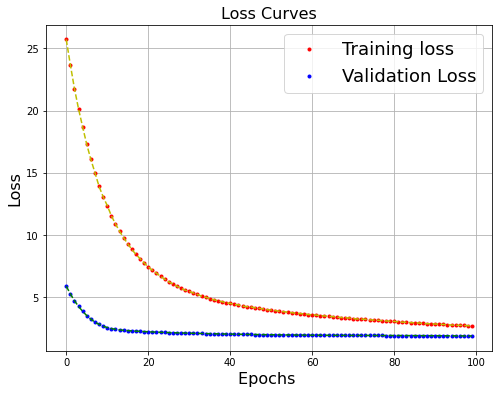

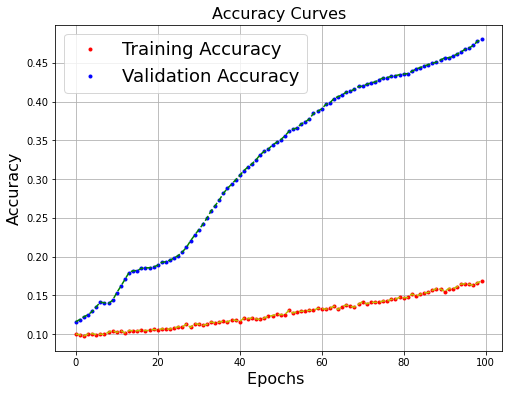

In [36]:
if PLOT:
    ## Plots
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.grid()
    plt.plot(history.history['loss'],'.r')
    plt.plot(history.history['val_loss'],'.b')
    plt.plot(history.history['loss'],'--y')
    plt.plot(history.history['val_loss'],'--g')
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.grid()
    plt.plot(history.history['accuracy'],'.r')
    plt.plot(history.history['val_accuracy'],'.b')
    plt.plot(history.history['accuracy'],'--y')
    plt.plot(history.history['val_accuracy'],'--g')
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

In [37]:
help(keras.Model.save)

Help on function save in module tensorflow.python.keras.engine.training:

save(self, filepath, overwrite=True, include_optimizer=True, save_format=None, signatures=None, options=None)
    Saves the model to Tensorflow SavedModel or a single HDF5 file.
    
    The savefile includes:
    
    - The model architecture, allowing to re-instantiate the model.
    - The model weights.
    - The state of the optimizer, allowing to resume training
        exactly where you left off.
    
    This allows you to save the entirety of the state of a model
    in a single file.
    
    Saved models can be reinstantiated via `keras.models.load_model`.
    The model returned by `load_model` is a compiled model ready to be used
    (unless the saved model was never compiled in the first place).
    
    Models built with the Sequential and Functional API can be saved to both the
    HDF5 and SavedModel formats. Subclassed models can only be saved with the
    SavedModel format.
    
    Note that the

In [30]:
output_model.save(filepath="./mnist_model_v3.h5", include_optimizer=True)